In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

import evaluate
import wrangle
import split_scale
import feature_engineering

# Using the data on student grades from this lesson, complete the following:

In [2]:
df = wrangle.wrangle_grades()
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


## Split the data into train and test datasets.

In [3]:
train, test = split_scale.split_my_data(df, 0.8)

In [4]:
predictions = pd.DataFrame({
    'actual': train.final_grade,
    'baseline': train.final_grade.mean()
})

## Create a model that uses exam 1 to predict the final grade.

In [5]:
X = train[['exam1']]
y = train.final_grade

lm = LinearRegression().fit(X, y)
predictions['exam1_lm'] = lm.predict(X)
predictions.head()

,actual,baseline,exam1_lm
89,65,81.555556,65.177796
80,87,81.555556,86.723480
98,76,81.555556,77.489615
96,81,81.555556,82.106547
53,95,81.555556,96.726833


## Create a model that uses exam 2 to predict the final grade.

In [6]:
X = train[['exam2']]
y = train.final_grade

lm = LinearRegression().fit(X, y)
predictions['exam2_lm'] = lm.predict(X)
predictions.head()

,actual,baseline,exam1_lm,exam2_lm
89,65,81.555556,65.177796,69.472453
80,87,81.555556,86.723480,87.195957
98,76,81.555556,77.489615,74.395649
96,81,81.555556,82.106547,74.395649
53,95,81.555556,96.726833,97.042348


## Compare your models in the following manner:
### Calculate the mean squared error

In [7]:
SSE1, ESS1, TSS1, MSE1, RMSE1 = evaluate.regression_errors(train.final_grade, predictions.exam1_lm)
SSE2, ESS2, TSS2, MSE2, RMSE2 = evaluate.regression_errors(train.final_grade, predictions.exam2_lm)

In [8]:
MSE1, MSE2

(4.134484679198818, 17.21584923568434)

In [9]:
RMSE1, RMSE2

(2.0333432271013216, 4.149198625720916)

### Visualize the residuals. Create a separate visualization for each model.

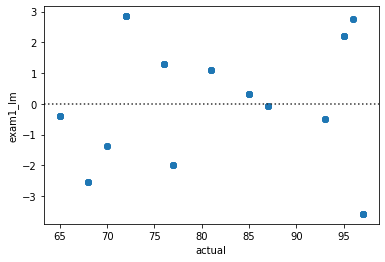

In [10]:
sns.residplot(predictions.actual, predictions.exam1_lm)

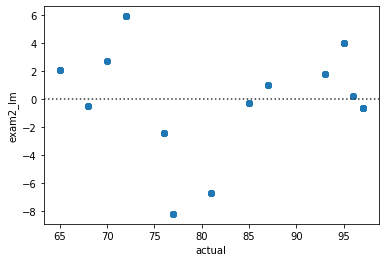

In [11]:
sns.residplot(predictions.actual, predictions.exam2_lm)

### Visualize the actual vs the predicted values. Create a seperate visualization for each model.

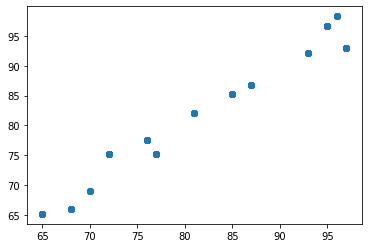

In [12]:
plt.scatter(predictions.actual, predictions.exam1_lm)

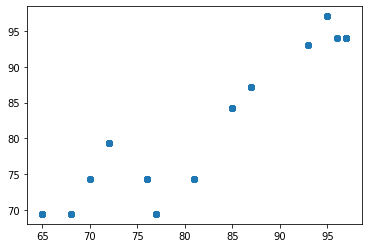

In [13]:
plt.scatter(predictions.actual, predictions.exam2_lm)

### Bonus: Combine the seperate visualizations for each model into a single visualization. Is this visual helpful?

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

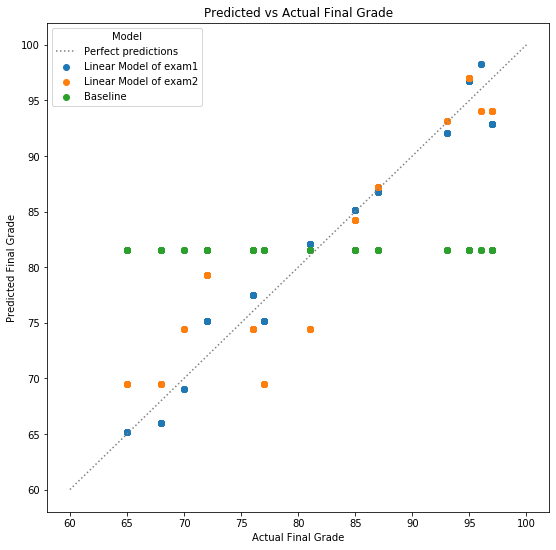

In [14]:
plt.figure(figsize=(9, 9))

plt.scatter(predictions.actual, predictions.exam1_lm, label='Linear Model of exam1', marker='o')
plt.scatter(predictions.actual, predictions.exam2_lm, label='Linear Model of exam2', marker='o')
plt.scatter(predictions.actual, predictions.baseline, label='Baseline', marker='o')
plt.plot([60, 100], [60, 100], label='Perfect predictions', ls=':', c='grey')

plt.legend(title='Model')
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')
plt.title('Predicted vs Actual Final Grade')

## Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?

In [15]:
X = train[['exam1', 'exam3']]
y = train.final_grade

lm = LinearRegression().fit(X, y)
predictions['exam_mlm'] = lm.predict(X)
predictions.head()

,actual,baseline,exam1_lm,exam2_lm,exam_mlm
89,65,81.555556,65.177796,69.472453,66.393544
80,87,81.555556,86.723480,87.195957,86.402434
98,76,81.555556,77.489615,74.395649,75.598949
96,81,81.555556,82.106547,74.395649,82.300502
53,95,81.555556,96.726833,97.042348,96.806399


In [16]:
SSE3, ESS3, TSS3, MSE3, RMSE3 = evaluate.regression_errors(train.final_grade, predictions.exam_mlm)
RMSE3

1.834807066899921

In [17]:
eval = pd.DataFrame(np.array(['RMSE']), columns=['metric'])

eval = pd.DataFrame({
    'metric': ['MSE', 'RMSE'],
    'exam1_lm': [MSE1, RMSE1],
    'exam2_lm': [MSE2, RMSE2],
    'exam_mlm': [MSE3, RMSE3]    
                       })

eval

,metric,exam1_lm,exam2_lm,exam_mlm
0,MSE,4.134485,17.215849,3.366517
1,RMSE,2.033343,4.149199,1.834807


In [18]:
# RMSE3 is lower than the other 2, so the error is lower for the model made with 2 features

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

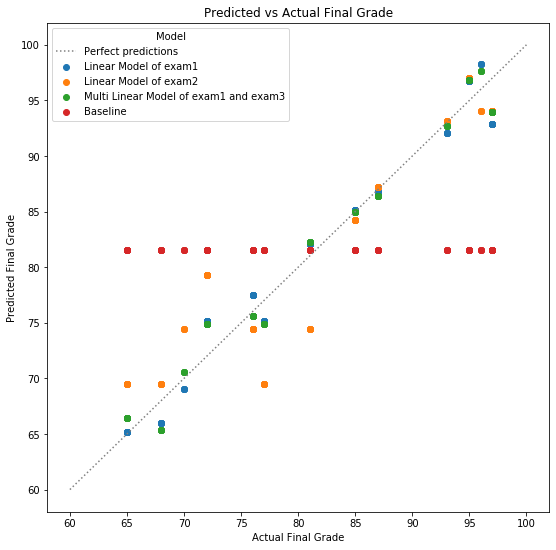

In [19]:
plt.figure(figsize=(9, 9))

plt.scatter(predictions.actual, predictions.exam1_lm, label='Linear Model of exam1', marker='o')
plt.scatter(predictions.actual, predictions.exam2_lm, label='Linear Model of exam2', marker='o')
plt.scatter(predictions.actual, predictions.exam_mlm, label='Multi Linear Model of exam1 and exam3', marker='o')
plt.scatter(predictions.actual, predictions.baseline, label='Baseline', marker='o')
plt.plot([60, 100], [60, 100], label='Perfect predictions', ls=':', c='grey')

plt.legend(title='Model')
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')
plt.title('Predicted vs Actual Final Grade')

## Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?

In [20]:
X = train[['exam1', 'exam3']]
y = train.final_grade

lm = LinearRegression().fit(X, y)

test_pred = pd.DataFrame({
    'actual': test.final_grade,
    'baseline': test.final_grade.mean()
})

test_pred['test_mlm'] = lm.predict(test[['exam1', 'exam3']])
test_pred.head()

,actual,baseline,test_mlm
20,76,83.571429,75.598949
13,96,83.571429,97.632122
75,68,83.571429,65.344119
8,77,83.571429,74.847793
61,70,83.571429,70.570043


In [21]:
SSE, ESS, TSS, MSE, RMSE = evaluate.regression_errors(test.final_grade, test_pred.test_mlm)
RMSE3, RMSE

(1.834807066899921, 1.4274455291788528)

> As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

# Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.

In [22]:
telco = wrangle.wrangle_telco()
train, test = split_scale.split_my_data(telco, 0.8)
scaler, train_mm, test_mm = split_scale.min_max_scaler(train, test)
train_mm.head()

,monthly_charges,tenure,total_charges
3460-TJBWI,0.057855,0.333333,0.070247
8295-KMENE,0.579052,0.819444,0.521274
8039-EQPIM,0.417456,0.958333,0.467757
3777-XROBG,0.011471,0.805556,0.124526
4884-TVUQF,0.826933,0.791667,0.666613


In [23]:
telco_preds = pd.DataFrame({
    'actual': train_mm.total_charges,
    'baseline': train_mm.total_charges.mean()
})

### Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

In [24]:
X = train_mm[['tenure']]
y = train_mm.total_charges

lm = LinearRegression().fit(X, y)
telco_preds['tenure_lm'] = lm.predict(X)
telco_preds.head()

,actual,baseline,tenure_lm
3460-TJBWI,0.070247,0.424789,0.085754
8295-KMENE,0.521274,0.424789,0.446935
8039-EQPIM,0.467757,0.424789,0.550130
3777-XROBG,0.124526,0.424789,0.436616
4884-TVUQF,0.666613,0.424789,0.426296


In [25]:
X = train_mm[['monthly_charges']]
y = train_mm.total_charges

lm = LinearRegression().fit(X, y)
telco_preds['monthly_lm'] = lm.predict(X)
telco_preds.head()

,actual,baseline,tenure_lm,monthly_lm
3460-TJBWI,0.070247,0.424789,0.085754,0.131968
8295-KMENE,0.521274,0.424789,0.446935,0.555905
8039-EQPIM,0.467757,0.424789,0.550130,0.424464
3777-XROBG,0.124526,0.424789,0.436616,0.094239
4884-TVUQF,0.666613,0.424789,0.426296,0.757528


In [26]:
X = train_mm[['tenure', 'monthly_charges']]
y = train_mm.total_charges

lm = LinearRegression().fit(X, y)
telco_preds['both_mlm'] = lm.predict(X)
telco_preds.head()

,actual,baseline,tenure_lm,monthly_lm,both_mlm
3460-TJBWI,0.070247,0.424789,0.085754,0.131968,0.009878
8295-KMENE,0.521274,0.424789,0.446935,0.555905,0.549529
8039-EQPIM,0.467757,0.424789,0.550130,0.424464,0.483514
3777-XROBG,0.124526,0.424789,0.436616,0.094239,0.142166
4884-TVUQF,0.666613,0.424789,0.426296,0.757528,0.715598


### Evaluate the models and your baseline.

Text(0.5, 1.0, 'Predicted vs Actual Total Charges')

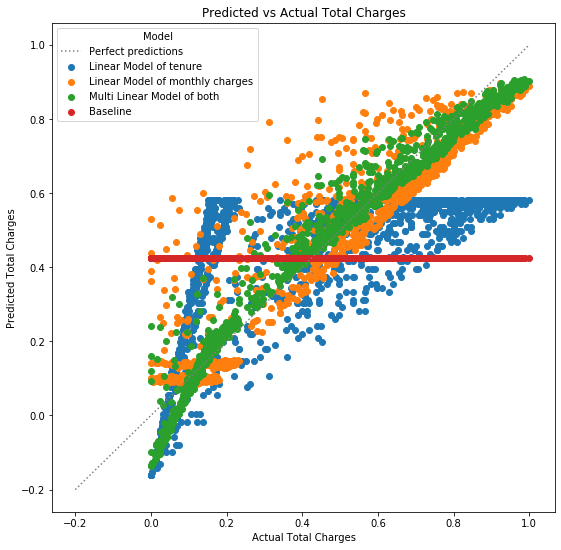

In [27]:
plt.figure(figsize=(9, 9))

plt.scatter(telco_preds.actual, telco_preds.tenure_lm, label='Linear Model of tenure', marker='o')
plt.scatter(telco_preds.actual, telco_preds.monthly_lm, label='Linear Model of monthly charges', marker='o')
plt.scatter(telco_preds.actual, telco_preds.both_mlm, label='Multi Linear Model of both', marker='o')
plt.scatter(telco_preds.actual, telco_preds.baseline, label='Baseline', marker='o')
plt.plot([-0.2, 1], [-0.2, 1], label='Perfect predictions', ls=':', c='grey')

plt.legend(title='Model')
plt.ylabel('Predicted Total Charges')
plt.xlabel('Actual Total Charges')
plt.title('Predicted vs Actual Total Charges')

In [28]:
SSE, ESS, TSS, MSE, RMSE = evaluate.regression_errors(train_mm.total_charges, telco_preds.baseline)
SSE1, ESS1, TSS1, MSE1, RMSE1 = evaluate.regression_errors(train_mm.total_charges, telco_preds.tenure_lm)
SSE2, ESS2, TSS2, MSE2, RMSE2 = evaluate.regression_errors(train_mm.total_charges, telco_preds.monthly_lm)
SSE3, ESS3, TSS3, MSE3, RMSE3 = evaluate.regression_errors(train_mm.total_charges, telco_preds.both_mlm)

eval = pd.DataFrame(np.array(['RMSE']), columns=['metric'])

eval = pd.DataFrame({
    'metric': ['RMSE'],
    'baseline': [RMSE],
    'tenure_lm': [RMSE1],
    'monthly_lm': [RMSE2],
    'both_mlm': [RMSE3]    
                       })

eval

,metric,baseline,tenure_lm,monthly_lm,both_mlm
0,RMSE,0.296625,0.229962,0.098514,0.056657


### Select the model that performed the best, and apply it to your test data.

In [33]:
X = train_mm[['tenure', 'monthly_charges']]
y = train_mm.total_charges

lm = LinearRegression().fit(X, y)
telco_test_pred = pd.DataFrame({
    'actual': test_mm.total_charges,
    'baseline': test_mm.total_charges.mean()
})
telco_test_pred['test_mlm'] = lm.predict(test_mm[['tenure', 'monthly_charges']])
telco_test_pred.head()

,actual,baseline,test_mlm
6285-FTQBF,0.215419,0.438612,0.252625
8871-JLMHM,0.726364,0.438612,0.690519
8311-UEUAB,0.603159,0.438612,0.581675
5248-KWLAR,0.729548,0.438612,0.706155
4139-DETXS,0.522255,0.438612,0.527800


In [34]:
SSE_bl, ESS_bl, TSS_bl, MSE_bl, RMSE_bl = evaluate.regression_errors(test_mm.total_charges, telco_test_pred.test_mlm)
RMSE_bl, RMSE3

(0.06437065577805369, 0.05665733449170364)